In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

csv = pd.read_csv("../../../backend/data_test.csv")
df = pd.DataFrame(csv)
df_time_offset = df["Timestamp"][0]
df["Timestamp"] = df["Timestamp"] - df_time_offset
df

,Timestamp,a_x,a_y,a_z,g_x,g_y,g_z,w_x,w_y,w_z,r_x,r_y,r_z,q_w,q_x,q_y,q_z
0,0.000000,0.062783,-0.664359,-0.745311,-1.486327,-0.954215,-1.100742,0.0,0.0,0.0,45.977032,2.722177,-50.473026,0.828528,-0.362494,0.146685,0.400777
1,0.010000,0.068403,-0.668227,-0.748759,0.846733,-0.104457,-2.227663,0.0,0.0,0.0,45.984718,2.737466,-50.489273,0.828422,-0.362581,0.146652,0.400930
2,0.020000,0.071032,-0.672759,-0.749368,0.630087,-0.068906,-1.911747,0.0,0.0,0.0,45.729458,2.834796,-50.418976,0.829316,-0.361150,0.144826,0.401037
3,0.030001,0.073829,-0.674456,-0.750533,0.789155,0.104108,-1.864622,0.0,0.0,0.0,45.736748,2.848875,-50.431267,0.829227,-0.361234,0.144787,0.401159
4,0.039999,0.074100,-0.673934,-0.749086,0.912611,-0.007038,-1.740844,0.0,0.0,0.0,45.745266,2.861296,-50.443478,0.829138,-0.361322,0.144765,0.401274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,59.959995,0.288413,-0.607716,-0.857441,16.279032,-0.668786,-7.142547,0.0,0.0,0.0,33.901562,12.762970,-46.368332,0.861102,-0.308202,0.016335,0.404039
5997,59.969997,0.267898,-0.616100,-0.847874,16.176073,-1.929723,-5.452105,0.0,0.0,0.0,34.064842,12.784996,-46.423275,0.860428,-0.309486,0.016889,0.404472
5998,59.980000,0.243766,-0.607581,-0.840962,16.973791,-2.367597,-3.386166,0.0,0.0,0.0,34.225212,12.784409,-46.465641,0.859845,-0.310682,0.017575,0.404764
5999,59.990002,0.226962,-0.590494,-0.836024,18.708357,-3.271112,-2.419889,0.0,0.0,0.0,34.403584,12.771029,-46.505039,0.859246,-0.311974,0.018415,0.405005


[[0.0, 8.6, 0], [10.36, 21.08, 1], [21.96, 30.8, 2], [32.72, 41.24, 3], [43.88, 51.52, 4], [52.52, 58.64, 0]]


<AxesSubplot:xlabel='Timestamp', ylabel='Pose'>

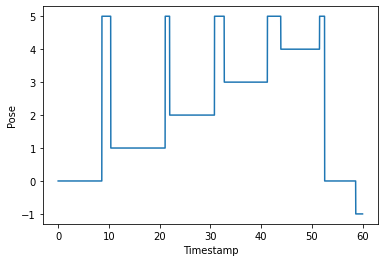

In [5]:
POSE_MAP= {
    "ingen_data": -1,
    "rett": 0,
    "framover": 1,
    "bakover": 2,
    "venstre": 3,
    "hoyre": 4,
    "overgang": 5
}

def get_timestamp_and_pose(filename):
    rows = []
    with open(filename, "r") as f:
        lines = f.readlines()
        offset = float(lines[1].strip().split(";")[1]) # This offset is the duration spent in the video before recording of data begun.
        for l in lines[1:]:
            sep_row = l.strip().split(";")
            finished_row = [round(float(x)-offset,2) for x in sep_row[1:3]]
            finished_row.append(POSE_MAP[sep_row[3].lower()])
            rows.append(finished_row)
    return rows

f_name = "../../../data/simon_data_2.txt"
stamped_poses = get_timestamp_and_pose(f_name)
print(stamped_poses)

df_stamped_poses = []
index = 0
for stamp in df["Timestamp"]:  
    pose_id = -1
    if stamp <= stamped_poses[-1][1]: 
        if stamp > stamped_poses[index][1]:
            index += 1
        pose_id = stamped_poses[index][2]
        # If timestamp is in new index, but haven't reached the starting time of this interval yet, set pose_id to default value 5.
        if stamp < stamped_poses[index][0]:
            pose_id = 5
    # If timestamp of the data point exceeds last timestamp recorded by the annotation, append default -1 value
    df_stamped_poses.append(pose_id)

#print(df_stamped_poses)

df["Pose"] = df_stamped_poses
#print(df[2400:2500][:])

#df['Pose'].hist(bins=4)
sns.lineplot(data=df, x="Timestamp", y='Pose')




In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df
y = df["Pose"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


[[ 40   0   0   0   0   0   0]
 [  0 432   0   0   0   0   0]
 [  0   0 303   0   0   0   0]
 [  0   0   0 287   0   0   0]
 [  0   0   0   0 259   0   0]
 [  0   0   0   0   0 243   1]
 [  0   0   0   0   0   0 236]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        40
           0       1.00      1.00      1.00       432
           1       1.00      1.00      1.00       303
           2       1.00      1.00      1.00       287
           3       1.00      1.00      1.00       259
           4       1.00      1.00      1.00       244
           5       1.00      1.00      1.00       236

    accuracy                           1.00      1801
   macro avg       1.00      1.00      1.00      1801
weighted avg       1.00      1.00      1.00      1801

